<a href="https://colab.research.google.com/github/Surweesh-SP/BDML/blob/main/BDML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
### Experiment 1
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# 3. Load dataset
df = sns.load_dataset('titanic')  # Titanic dataset
df.head()

# 4. Explore the dataset
print(df.info())
print(df.describe())
print(df.isnull().sum())

# 5. Handle missing values
# Fill age with median, embark_town with mode
df['age'].fillna(df['age'].median(), inplace=True)
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)
df.drop(columns=['deck'], inplace=True)  # too many missing values

# 6. Encode categorical variables
# Convert 'sex' and 'embark_town' using LabelEncoder
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['embark_town'] = le.fit_transform(df['embark_town'])

# Drop non-informative or redundant columns
df.drop(columns=['embarked', 'class', 'who', 'alive', 'adult_male', 'alone'], inplace=True)

# 7. Feature Scaling
scaler = StandardScaler()
numerical_cols = ['age', 'fare']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# 8. Split dataset
# Define features (X) and label (y)
X = df.drop('survived', axis=1)
y = df['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 9. Show final preprocessed data
print("Training Data Shape:", X_train.shape)
print("Test Data Shape:", X_test.shape)
X_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None
         survived      pclass         age       sibsp       parch        f

/tmp/ipython-input-2809384154.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
/tmp/ipython-input-2809384154.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

,pclass,sex,age,sibsp,parch,fare,embark_town
331,1,1,1.240235,0,0,-0.074583,2
733,2,1,-0.488887,0,0,-0.386671,2
382,3,1,0.202762,0,0,-0.488854,2
704,3,1,-0.258337,1,0,-0.490280,2
813,3,0,-1.795334,4,2,-0.018709,2


SVM Accuracy: 0.9777777777777777
SVM Confusion Matrix:
 [[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]
Random Forest Accuracy: 1.0
Random Forest Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


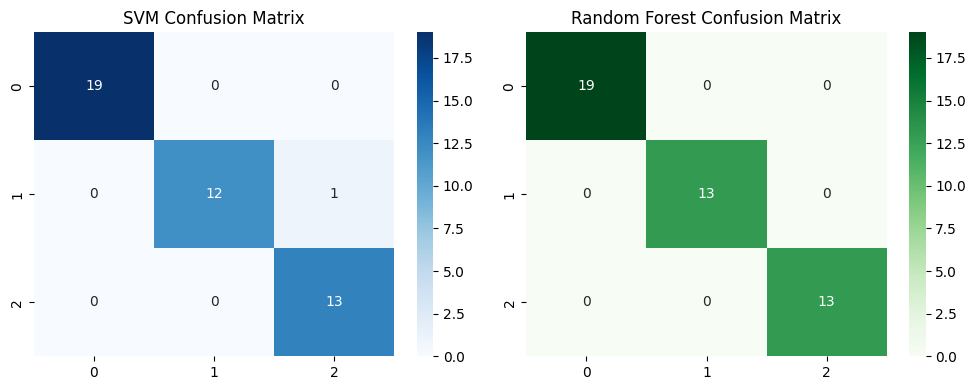

In [2]:
### Experiment 2

import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# 3. Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)


# ----------------------------------
# Part A: SUPPORT VECTOR MACHINE
# ----------------------------------
# 5. Initialize and train SVM
svm_model = SVC(kernel='linear')  # You can also try 'rbf', 'poly'
svm_model.fit(X_train, y_train)

# 6. Predict and evaluate SVM
y_pred_svm = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

# ----------------------------------
# Part B: RANDOM FOREST
# ----------------------------------
# 7. Initialize and train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 8. Predict and evaluate Random Forest
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# 9. (Optional) Visual comparison using seaborn heatmap
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, cmap='Blues')
plt.title("SVM Confusion Matrix")

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, cmap='Greens')
plt.title("Random Forest Confusion Matrix")

plt.tight_layout()
plt.show()

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Accuracy Score: 1.0


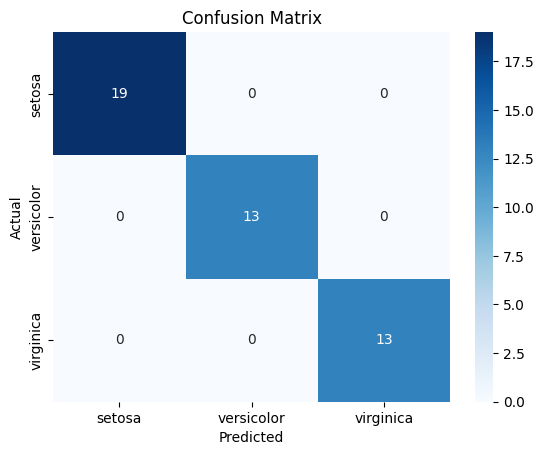

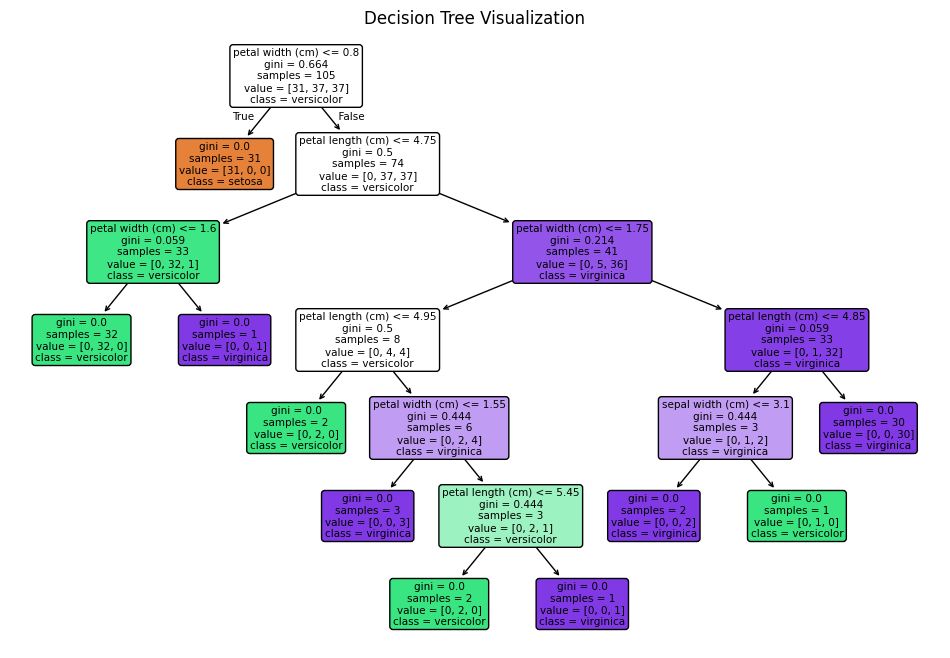

In [3]:
### Experiment 3


# Step 1: Import Libraries
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load Dataset
iris = load_iris()
X = iris.data
y = iris.target

# Step 3: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Step 4: Train the Decision Tree Classifier
dt_model = DecisionTreeClassifier(criterion='gini', random_state=0)
dt_model.fit(X_train, y_train)

# Step 5: Predict
y_pred = dt_model.predict(X_test)

# Step 6: Evaluate the Model
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("Accuracy Score:", acc)

# Step 7: Visualize Confusion Matrix
sns.heatmap(
    cm, annot=True, cmap="Blues",
    xticklabels=iris.target_names,
    yticklabels=iris.target_names,
    fmt='d'  # To ensure integer annotations
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Step 8: Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(
    dt_model, filled=True,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    rounded=True
)
plt.title("Decision Tree Visualization")
plt.show()


Best Params (CV): {'C': 10, 'gamma': 0.01}

=== SVM (RBF) — Test Metrics ===
Accuracy : 0.9825
Precision: 0.9861
Recall   : 0.9861
F1-Score : 0.9861
ROC-AUC  : 0.9977

Confusion Matrix:
 [[41  1]
 [ 1 71]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



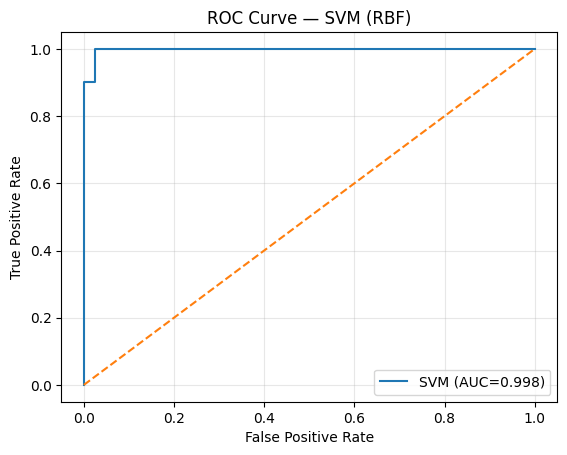

In [4]:
### Experiment 4
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score, roc_curve
)

# 2) Load dataset (binary classification)
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)


y = pd.Series(data.target, name="target")  # 0 = malignant, 1 = benign

# 3) Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

# 4) Standardize features (important for SVMs)
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

# 5) Define model
svm = SVC(kernel='rbf', probability=True, random_state=42)

# 6) Hyperparameter grid & tuning
param_grid = {
    "C": [0.1, 1, 10, 100],
    "gamma": ["scale", 0.01, 0.001, 0.0001]
}

grid = GridSearchCV(
    estimator=svm,
    param_grid=param_grid,
    scoring='f1',  # can change to 'accuracy' or 'roc_auc' as needed
    cv=5,
    n_jobs=-1,
    verbose=0
)

grid.fit(X_train_sc, y_train)

print("Best Params (CV):", grid.best_params_)
best_svm = grid.best_estimator_

# 7) Train final model & predict
best_svm.fit(X_train_sc, y_train)
y_pred = best_svm.predict(X_test_sc)
y_prob = best_svm.predict_proba(X_test_sc)[:, 1]

# 8) Evaluate
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)
cm = confusion_matrix(y_test, y_pred)

print("\n=== SVM (RBF) — Test Metrics ===")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-Score : {f1:.4f}")
print(f"ROC-AUC  : {auc:.4f}")

print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

# 9) Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr, label=f"SVM (AUC={auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve — SVM (RBF)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()



--- Part 1: K-Means Clustering ---

Original K-Means Dataset Head:
   Feature_1  Feature_2
0  -7.155244  -7.390016
1  -7.395875  -7.110843
2  -2.015671   8.281780
3   4.509270   2.632436
4  -8.102502  -7.484961


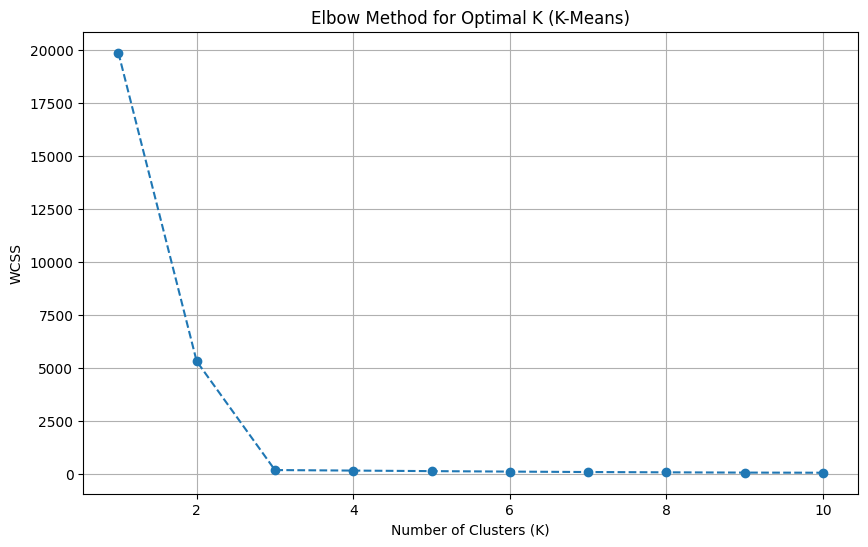

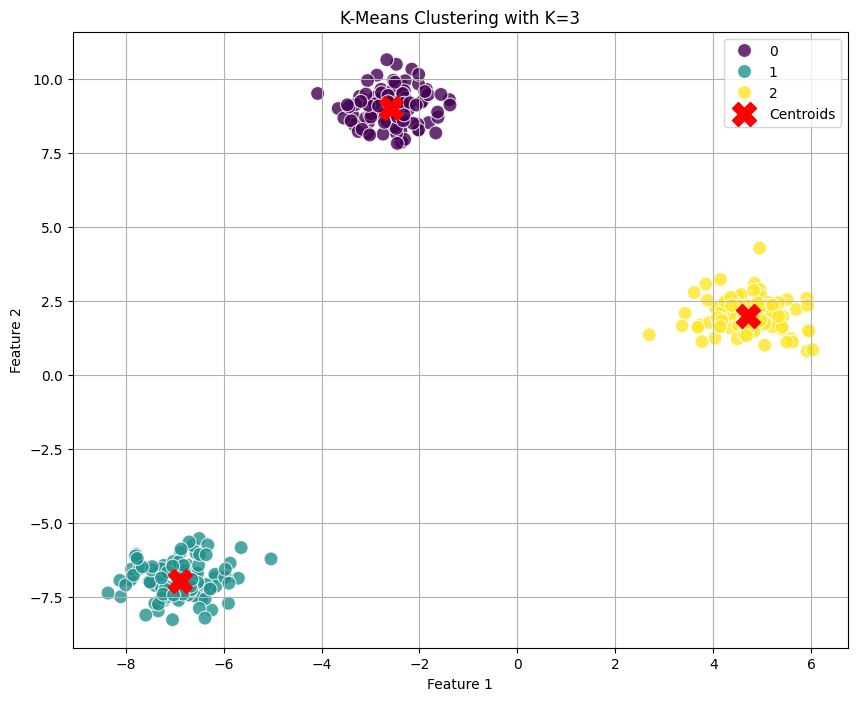


Silhouette Score for K-Means (K=3): 0.908

--- Part 2: Dimensionality Reduction with PCA ---

Original PCA Dataset Head:
   Feature_1  Feature_2  Feature_3  Feature_4  True_Cluster
0  -0.638667   1.110057  -6.400722  -0.204990             3
1  -2.951556  -7.657445   3.844794   0.903589             1
2  -0.253177   2.125103  -7.869801   0.559678             3
3  -2.151209   3.401400  -5.734930   0.965230             3
4  -2.347519  -7.230467   3.478891  -0.443440             1
Original PCA Dataset Shape: (500, 5)

Scaled PCA Dataset Head:
   Feature_1  Feature_2  Feature_3  Feature_4
0  -0.559286   0.720080  -1.022508   0.994456
1  -1.182017  -1.523760   1.516183   1.303719
2  -0.455495   0.979857  -1.386524   1.207777
3  -0.966528   1.306496  -0.857534   1.320915
4  -1.019384  -1.414484   1.425518   0.927935

Principal Components DataFrame Head:
   Principal_Component_1  Principal_Component_2  True_Cluster
0               0.455305               1.623917             3
1              -2

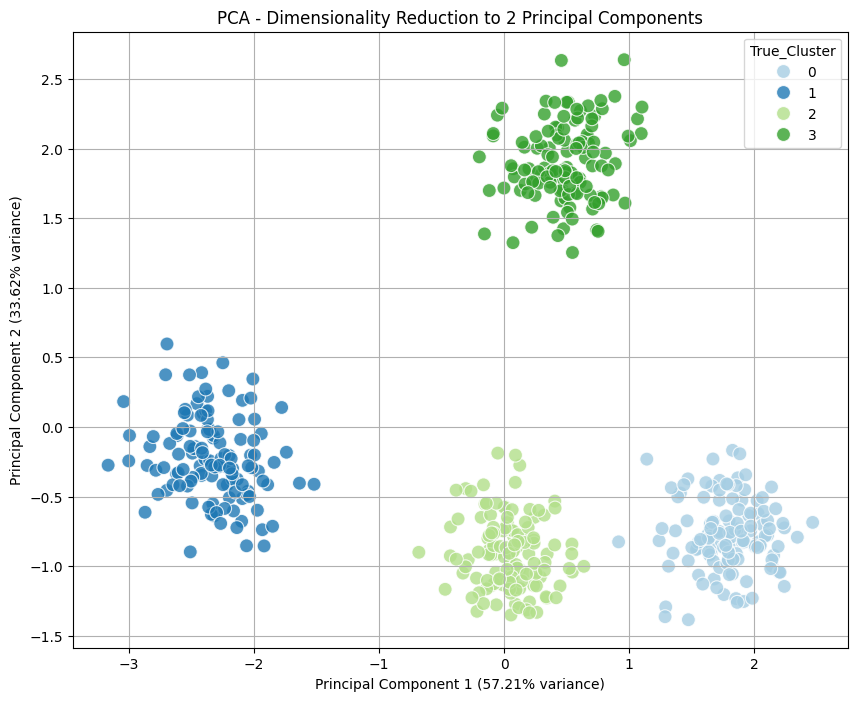

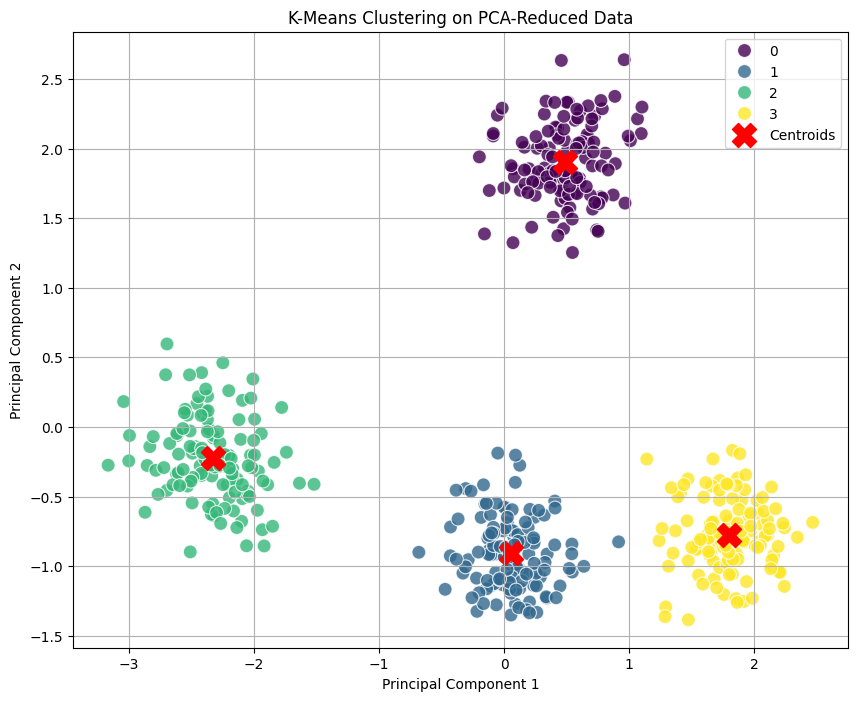


Silhouette Score for K-Means on PCA-Reduced Data (K=4): 0.776


In [5]:
###  EXperiment 5
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs  # A simple dataset generator for clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score  # To evaluate clustering performance

# --- Part 1: K-Means Clustering ---
print("--- Part 1: K-Means Clustering ---")

# 1. Dataset Generation (synthetic dataset with 3 clusters)
X, y = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=42)

# Convert to DataFrame (optional)
df_kmeans = pd.DataFrame(X, columns=['Feature_1', 'Feature_2'])
print("\nOriginal K-Means Dataset Head:")
print(df_kmeans.head())

# 2. Elbow Method to find optimal K
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # inertia_ is the WCSS

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K (K-Means)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# Assume K=3 from the elbow plot

# 3. Apply K-Means with chosen K
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(X)
df_kmeans['Cluster'] = clusters

# 4. Visualize K-Means Clustering Result
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Feature_1', y='Feature_2', hue='Cluster', data=df_kmeans,
                palette='viridis', s=100, alpha=0.8, legend='full')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='red', marker='X', label='Centroids')
plt.title(f'K-Means Clustering with K={optimal_k}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.grid(True)
plt.show()

# 5. Evaluate K-Means using Silhouette Score
silhouette_avg = silhouette_score(X, clusters)
print(f"\nSilhouette Score for K-Means (K={optimal_k}): {silhouette_avg:.3f}")

# --- Part 2: Dimensionality Reduction with PCA ---
print("\n--- Part 2: Dimensionality Reduction with PCA ---")

# 1. Dataset Generation with 4 features and 4 clusters
X_pca, y_pca = make_blobs(n_samples=500, n_features=4, centers=4, cluster_std=1.0, random_state=25)
df_pca_original = pd.DataFrame(X_pca, columns=[f'Feature_{i+1}' for i in range(X_pca.shape[1])])
df_pca_original['True_Cluster'] = y_pca

print("\nOriginal PCA Dataset Head:")
print(df_pca_original.head())
print(f"Original PCA Dataset Shape: {df_pca_original.shape}")

# 2. Standardize the Data
scaler = StandardScaler()
X_pca_scaled = scaler.fit_transform(X_pca)
df_pca_scaled = pd.DataFrame(X_pca_scaled, columns=[f'Feature_{i+1}' for i in range(X_pca_scaled.shape[1])])
print("\nScaled PCA Dataset Head:")
print(df_pca_scaled.head())

# 3. Perform PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_pca_scaled)

df_principal_components = pd.DataFrame(data=principal_components,
                                       columns=['Principal_Component_1', 'Principal_Component_2'])
df_principal_components['True_Cluster'] = y_pca

print("\nPrincipal Components DataFrame Head:")
print(df_principal_components.head())

# 4. Explained Variance Ratio
explained_variance = pca.explained_variance_ratio_
print(f"\nExplained Variance Ratio for each PC: {explained_variance}")
print(f"Total Explained Variance by 2 PCs: {explained_variance.sum():.3f}")

# 5. Visualize PCA Result
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Principal_Component_1', y='Principal_Component_2', hue='True_Cluster',
                data=df_principal_components, palette='Paired', s=100, alpha=0.8, legend='full')
plt.title('PCA - Dimensionality Reduction to 2 Principal Components')
plt.xlabel(f'Principal Component 1 ({explained_variance[0]*100:.2f}% variance)')
plt.ylabel(f'Principal Component 2 ({explained_variance[1]*100:.2f}% variance)')
plt.grid(True)
plt.show()

# 6. Optional: K-Means on PCA-reduced data
kmeans_pca = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters_pca = kmeans_pca.fit_predict(principal_components)
df_principal_components['KMeans_Cluster_on_PCA'] = clusters_pca

plt.figure(figsize=(10, 8))
sns.scatterplot(x='Principal_Component_1', y='Principal_Component_2',
                hue='KMeans_Cluster_on_PCA',
                data=df_principal_components, palette='viridis', s=100, alpha=0.8, legend='full')
plt.scatter(kmeans_pca.cluster_centers_[:, 0], kmeans_pca.cluster_centers_[:, 1],
            s=300, c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering on PCA-Reduced Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

silhouette_avg_pca = silhouette_score(principal_components, clusters_pca)
print(f"\nSilhouette Score for K-Means on PCA-Reduced Data (K=4): {silhouette_avg_pca:.3f}")



--- Part 1: Building a Simple Feedforward Neural Network ---

Original FNN training data shape: (60000, 28, 28)
Original FNN test data shape: (10000, 28, 28)
Flattened and Normalized FNN training data shape: (60000, 784)
Flattened and Normalized FNN test data shape: (10000, 784)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



--- FNN Model Summary ---



--- Training FNN Model ---

--- Evaluating FNN Model on Test Data ---
FNN Test Loss: 0.3359
FNN Test Accuracy: 0.8821

--- FNN Classification Report ---
              precision    recall  f1-score   support

           0       0.80      0.86      0.83      1000
           1       0.98      0.97      0.98      1000
           2       0.78      0.82      0.80      1000
           3       0.87      0.90      0.88      1000
           4       0.80      0.79      0.80      1000
           5       0.98      0.96      0.97      1000
           6       0.74      0.64      0.68      1000
           7       0.94      0.97      0.95      1000
           8       0.97      0.97      0.97      1000
           9       0.96      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000


--- FNN Confusion Matrix ---


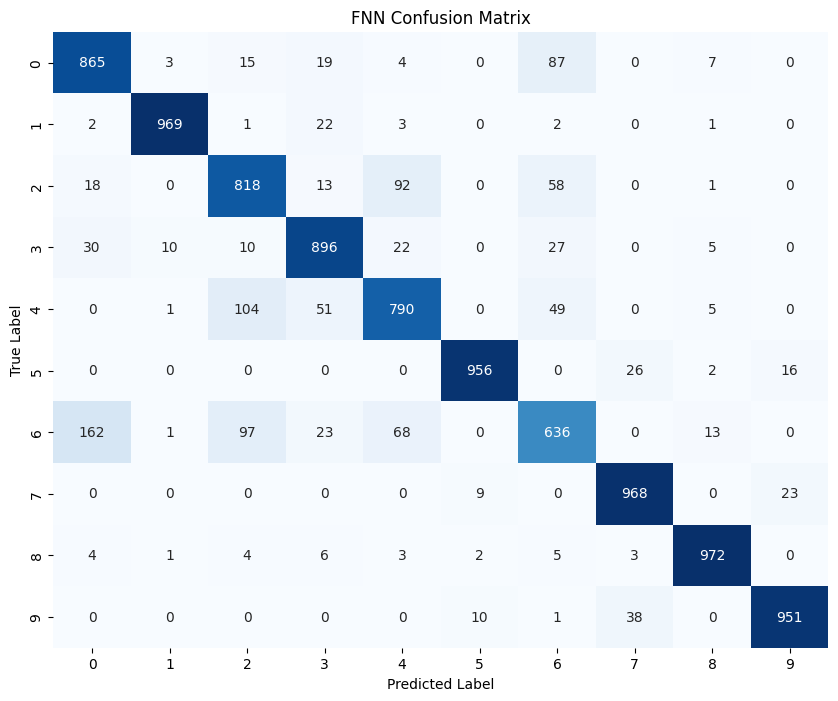

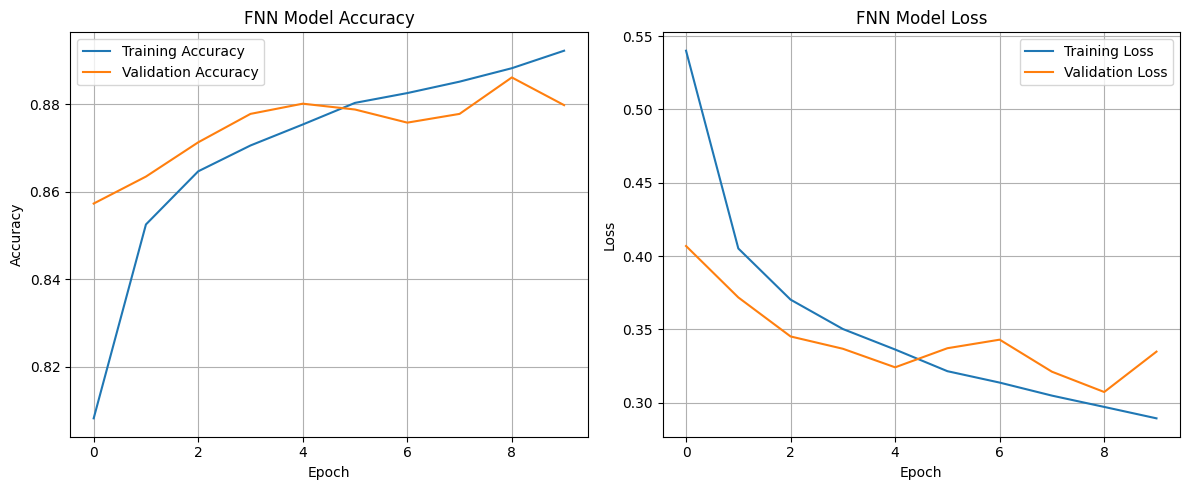


--- Part 2: Implementing a Convolutional Neural Network (CNN) ---

Original CNN training data shape: (60000, 28, 28)
Original CNN test data shape: (10000, 28, 28)
Reshaped and Normalized CNN training data shape: (60000, 28, 28, 1)
Reshaped and Normalized CNN test data shape: (10000, 28, 28, 1)

--- CNN Model Summary ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



--- Training CNN Model ---

--- Evaluating CNN Model on Test Data ---
CNN Test Loss: 0.0244
CNN Test Accuracy: 0.9928

--- CNN Classification Report ---
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       1.00      1.00      1.00       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000


--- CNN Confusion Matrix ---


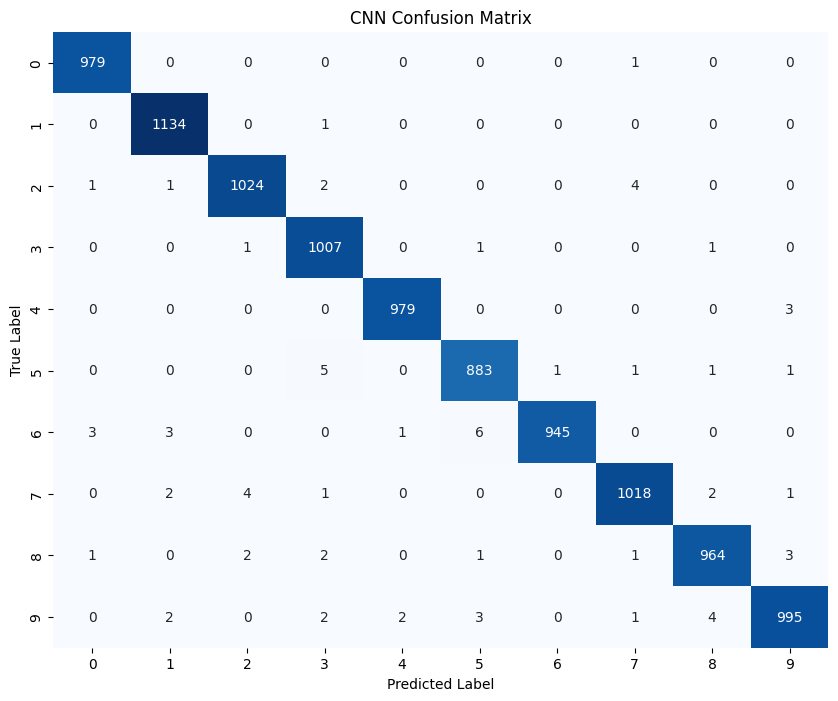

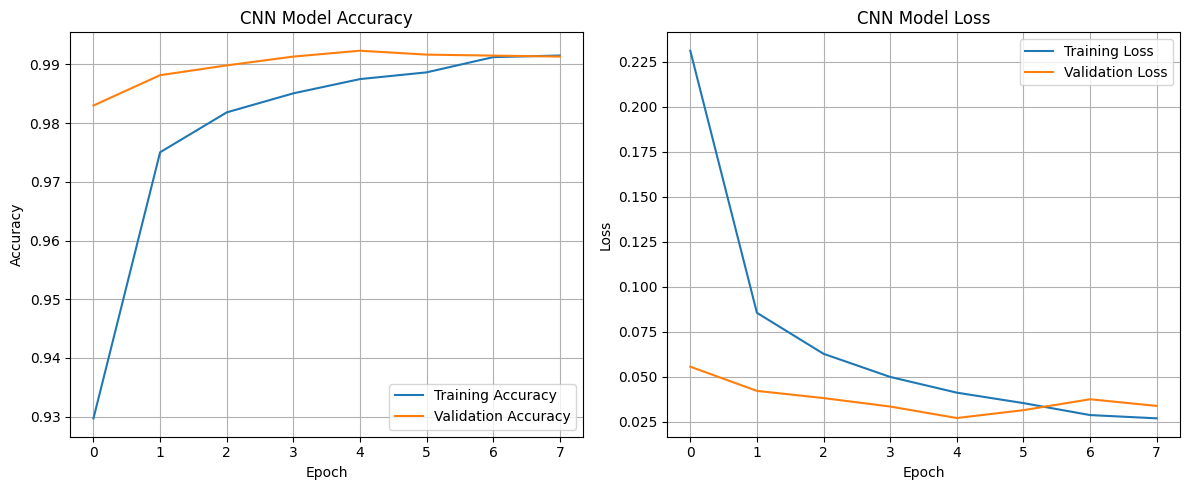


--- Sample CNN Predictions ---


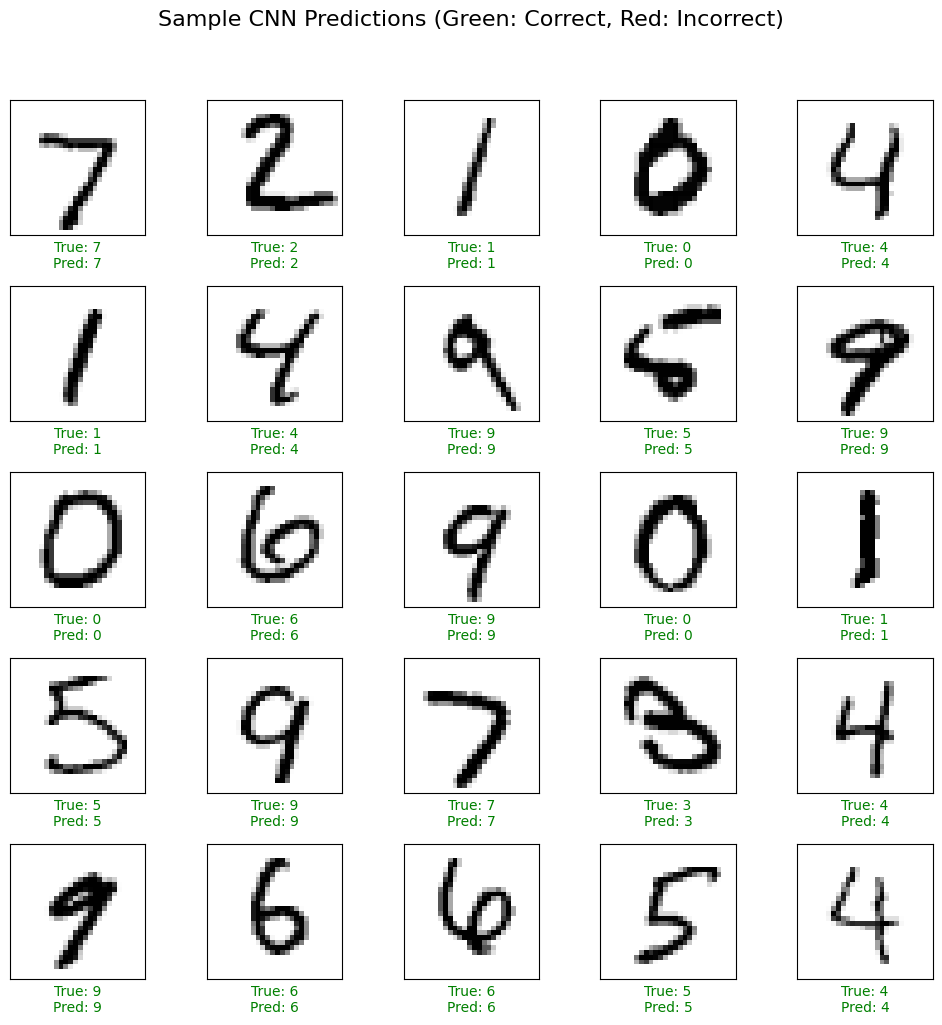

In [7]:
### EXperiment 6

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist, fashion_mnist
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Suppress TensorFlow warnings for cleaner output
tf.keras.utils.disable_interactive_logging()

# --- Part 1: Building a Simple Feedforward Neural Network (FNN) on Fashion MNIST ---

print("--- Part 1: Building a Simple Feedforward Neural Network ---")

# Load and preprocess Fashion MNIST
(x_train_fnn, y_train_fnn), (x_test_fnn, y_test_fnn) = fashion_mnist.load_data()
print(f"\nOriginal FNN training data shape: {x_train_fnn.shape}")
print(f"Original FNN test data shape: {x_test_fnn.shape}")

# Flatten and normalize
x_train_fnn_flat = x_train_fnn.reshape(-1, 28 * 28) / 255.0
x_test_fnn_flat = x_test_fnn.reshape(-1, 28 * 28) / 255.0

print(f"Flattened and Normalized FNN training data shape: {x_train_fnn_flat.shape}")
print(f"Flattened and Normalized FNN test data shape: {x_test_fnn_flat.shape}")

# Build model
model_fnn = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_fnn.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

print("\n--- FNN Model Summary ---")
model_fnn.summary()

# Early stopping to prevent overfitting
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train model
print("\n--- Training FNN Model ---")
history_fnn = model_fnn.fit(x_train_fnn_flat, y_train_fnn,
                            epochs=10,
                            validation_split=0.1,
                            callbacks=[early_stop],
                            verbose=1)

# Evaluate model
print("\n--- Evaluating FNN Model on Test Data ---")
loss_fnn, accuracy_fnn = model_fnn.evaluate(x_test_fnn_flat, y_test_fnn, verbose=0)
print(f"FNN Test Loss: {loss_fnn:.4f}")
print(f"FNN Test Accuracy: {accuracy_fnn:.4f}")

# Predictions and reports
y_pred_fnn = np.argmax(model_fnn.predict(x_test_fnn_flat), axis=-1)
print("\n--- FNN Classification Report ---")
print(classification_report(y_test_fnn, y_pred_fnn))

print("\n--- FNN Confusion Matrix ---")
cm_fnn = confusion_matrix(y_test_fnn, y_pred_fnn)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_fnn, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("FNN Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Plot training history
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_fnn.history['accuracy'], label='Training Accuracy')
plt.plot(history_fnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('FNN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history_fnn.history['loss'], label='Training Loss')
plt.plot(history_fnn.history['val_loss'], label='Validation Loss')
plt.title('FNN Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# --- Part 2: Implementing a CNN on MNIST ---

print("\n--- Part 2: Implementing a Convolutional Neural Network (CNN) ---")

# Load and preprocess MNIST
(x_train_cnn, y_train_cnn), (x_test_cnn, y_test_cnn) = mnist.load_data()
print(f"\nOriginal CNN training data shape: {x_train_cnn.shape}")
print(f"Original CNN test data shape: {x_test_cnn.shape}")

# Reshape and normalize
x_train_cnn = x_train_cnn.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test_cnn = x_test_cnn.reshape(-1, 28, 28, 1).astype('float32') / 255.0

print(f"Reshaped and Normalized CNN training data shape: {x_train_cnn.shape}")
print(f"Reshaped and Normalized CNN test data shape: {x_test_cnn.shape}")

num_classes_cnn = 10

# Build CNN model
model_cnn = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes_cnn, activation='softmax')
])

model_cnn.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

print("\n--- CNN Model Summary ---")
model_cnn.summary()

# Early stopping
early_stop_cnn = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train CNN
print("\n--- Training CNN Model ---")
history_cnn = model_cnn.fit(x_train_cnn, y_train_cnn,
                            epochs=10,
                            validation_split=0.1,
                            callbacks=[early_stop_cnn],
                            verbose=1)

# Evaluate CNN
print("\n--- Evaluating CNN Model on Test Data ---")
loss_cnn, accuracy_cnn = model_cnn.evaluate(x_test_cnn, y_test_cnn, verbose=0)
print(f"CNN Test Loss: {loss_cnn:.4f}")
print(f"CNN Test Accuracy: {accuracy_cnn:.4f}")

# Predictions and reports
y_pred_cnn = np.argmax(model_cnn.predict(x_test_cnn), axis=-1)
print("\n--- CNN Classification Report ---")
print(classification_report(y_test_cnn, y_pred_cnn))

print("\n--- CNN Confusion Matrix ---")
cm_cnn = confusion_matrix(y_test_cnn, y_pred_cnn)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_cnn, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("CNN Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Plot CNN training history
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['accuracy'], label='Training Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['loss'], label='Training Loss')
plt.plot(history_cnn.history['val_loss'], label='Validation Loss')
plt.title('CNN Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Sample CNN Predictions visualization
print("\n--- Sample CNN Predictions ---")
class_names_mnist = [str(i) for i in range(10)]

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test_cnn[i].reshape(28, 28), cmap=plt.cm.binary)
    true_label = y_test_cnn[i]
    predicted_label = y_pred_cnn[i]
    color = 'green' if true_label == predicted_label else 'red'
    plt.xlabel(f"True: {class_names_mnist[true_label]}\nPred: {class_names_mnist[predicted_label]}", color=color)

plt.suptitle("Sample CNN Predictions (Green: Correct, Red: Incorrect)", y=1.02, fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()


--- Part 1: Loading and Preprocessing the MNIST Dataset ---
Normalized training data shape: (60000, 28, 28, 1)
Example of a normalized pixel value: -1.0

--- Part 2: Building the GAN Components ---

--- Generator Model Summary ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



--- Discriminator Model Summary ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



--- Beginning GAN Training ---
Epoch 1/2 - Generator Loss: 0.8024, Discriminator Loss: 0.9801
Epoch 2/2 - Generator Loss: 0.8474, Discriminator Loss: 1.2414

--- Training complete. Generating final images. ---


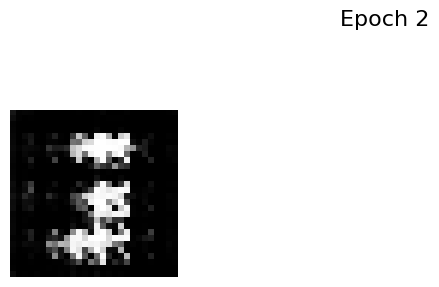

In [8]:
### EXperiment 7

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import os

# Suppress TensorFlow warnings for cleaner output
tf.keras.utils.disable_interactive_logging()

# --- Part 1: Dataset Loading and Preprocessing ---

print("--- Part 1: Loading and Preprocessing the MNIST Dataset ---")

# Load the MNIST dataset
(x_train, _), (_, _) = mnist.load_data()

# Reshape images to (28, 28, 1) and convert to float32
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')

# Normalize pixel values to [-1, 1]
x_train = (x_train - 127.5) / 127.5

print(f"Normalized training data shape: {x_train.shape}")
print("Example of a normalized pixel value:", x_train[0, 0, 0, 0])

# --- Part 2: Building the Generator and Discriminator Models ---

print("\n--- Part 2: Building the GAN Components ---")

latent_dim = 100  # Size of the noise vector

def build_generator():
    model = keras.Sequential(name="generator")
    # Project and reshape
    model.add(layers.Dense(7 * 7 * 256, use_bias=False, input_shape=(latent_dim,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    model.add(layers.Reshape((7, 7, 256)))

    # Upsample to 7x7 -> 14x14
    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    # Upsample to 14x14 -> 28x28
    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    # Final layer: output image with tanh activation (range [-1,1])
    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))

    return model

generator = build_generator()
print("\n--- Generator Model Summary ---")
generator.summary()

def build_discriminator():
    model = keras.Sequential(name="discriminator")
    # Downsample
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=[28, 28, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1, activation='sigmoid'))  # Real or fake output

    return model

discriminator = build_discriminator()
print("\n--- Discriminator Model Summary ---")
discriminator.summary()

# --- Part 3: Loss Functions, Optimizers, and Training ---

cross_entropy = keras.losses.BinaryCrossentropy(from_logits=False)

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    return real_loss + fake_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

generator_optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)

batch_size = 256

@tf.function
def train_step(images):
    noise = tf.random.normal([batch_size, latent_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    return gen_loss, disc_loss

def generate_and_save_images(model, epoch, test_input):
    predictions = model(test_input, training=False)
    predictions_rescaled = (predictions * 0.5) + 0.5  # Scale back to [0,1]

    fig = plt.figure(figsize=(10, 10))
    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i + 1)
        plt.imshow(predictions_rescaled[i, :, :, 0], cmap='gray')
        plt.axis('off')

    plt.suptitle(f"Epoch {epoch}", fontsize=16)

    if not os.path.exists('images'):
        os.makedirs('images')
    plt.savefig(f'images/image_at_epoch_{epoch:04d}.png')
    plt.show()

EPOCHS = 2
num_examples_to_generate = 1
seed = tf.random.normal([num_examples_to_generate, latent_dim])

# Prepare dataset
train_dataset = tf.data.Dataset.from_tensor_slices(x_train).shuffle(x_train.shape[0]).batch(batch_size)

def train(dataset, epochs):
    print("\n--- Beginning GAN Training ---")
    for epoch in range(epochs):
        gen_loss_list = []
        disc_loss_list = []

        for image_batch in dataset:
            gen_loss, disc_loss = train_step(image_batch)
            gen_loss_list.append(gen_loss.numpy())
            disc_loss_list.append(disc_loss.numpy())

        avg_gen_loss = np.mean(gen_loss_list)
        avg_disc_loss = np.mean(disc_loss_list)

        print(f"Epoch {epoch + 1}/{epochs} - "
              f"Generator Loss: {avg_gen_loss:.4f}, "
              f"Discriminator Loss: {avg_disc_loss:.4f}")

        if (epoch + 1) % 20 == 0:
            generate_and_save_images(generator, epoch + 1, seed)

    print("\n--- Training complete. Generating final images. ---")
    generate_and_save_images(generator, epochs, seed)

# Run training
train(train_dataset, EPOCHS)


--- Part 1: Hyperparameter Tuning with Grid Search ---

Dataset Features (X) shape: (150, 4)
Dataset Labels (y) shape: (150,)
Feature Names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target Names: ['setosa' 'versicolor' 'virginica']

Training set size: 105 samples
Test set size: 45 samples

Features standardized.

Hyperparameter grid defined:
 C: [0.1, 1, 10, 100]
 gamma: [1, 0.1, 0.01, 0.001]
 kernel: ['rbf', 'linear']

Starting Grid Search with 5-fold Cross-Validation...
Fitting 5 folds for each of 32 candidates, totalling 160 fits

Grid Search completed.

Best hyperparameters found: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best cross-validation accuracy: 0.9810

Test set accuracy with tuned model: 0.9111

--- Classification Report for Tuned Model ---
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.88        15
   virginica       0.92      0.80

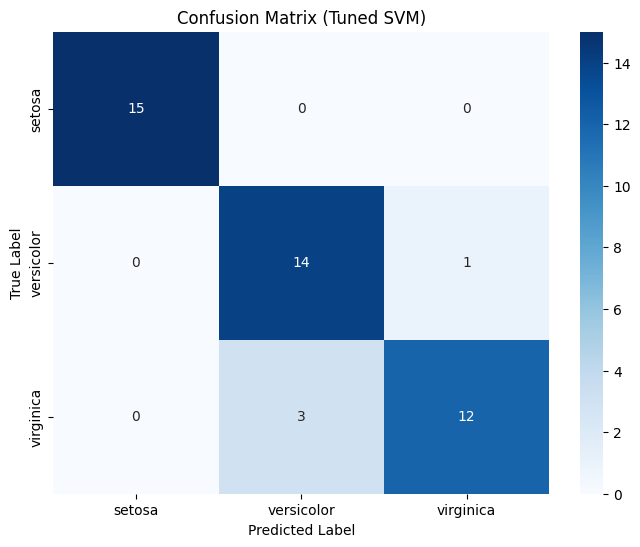


--- Top 5 Grid Search Results ---
    param_C  param_gamma param_kernel  mean_test_score  rank_test_score
10      1.0        0.100          rbf         0.980952                1
27    100.0        0.100       linear         0.980952                1
31    100.0        0.001       linear         0.980952                1
29    100.0        0.010       linear         0.980952                1
25    100.0        1.000       linear         0.980952                1

--- Part 2: Cross-Validation Techniques (k-fold) ---

Performing 5-fold cross-validation...

Cross-validation scores for each fold: [1.         0.95238095 0.95238095 0.95238095 1.        ]
Mean cross-validation accuracy: 0.9714
Standard deviation of cross-validation accuracy: 0.0233


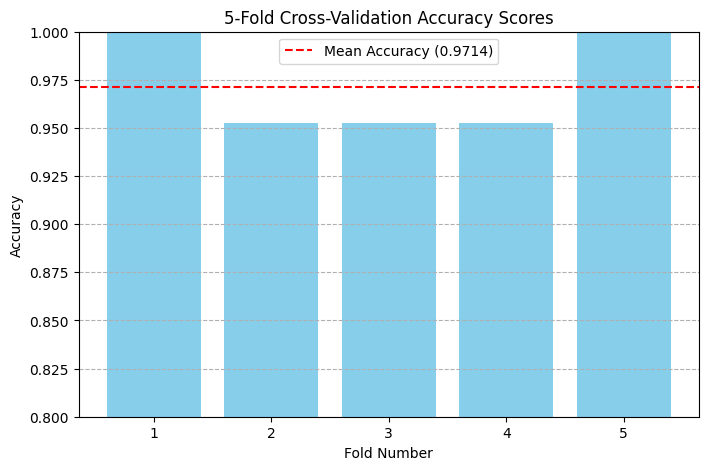

In [9]:
### Experiment 8

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris  # Classic dataset for classification
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.svm import SVC  # Support Vector Classifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# --- Part 1: Hyperparameter Tuning with Grid Search ---

print("--- Part 1: Hyperparameter Tuning with Grid Search ---")

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

print(f"\nDataset Features (X) shape: {X.shape}")
print(f"Dataset Labels (y) shape: {y.shape}")
print(f"Feature Names: {feature_names}")
print(f"Target Names: {target_names}")

# Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

# Standardize Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nFeatures standardized.")

# Define the Model and Hyperparameter Grid
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': [1, 0.1, 0.01, 0.001],  # Kernel coefficient
    'kernel': ['rbf', 'linear']  # Kernel type
}

print("\nHyperparameter grid defined:")
for param, values in param_grid.items():
    print(f" {param}: {values}")

# Perform Grid Search with 5-fold Cross-Validation
grid_search = GridSearchCV(
    SVC(),
    param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

print("\nStarting Grid Search with 5-fold Cross-Validation...")
grid_search.fit(X_train_scaled, y_train)
print("\nGrid Search completed.")

# Best Parameters and Score
print(f"\nBest hyperparameters found: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

# Evaluate Best Model on Test Set
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test_scaled)

test_accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f"\nTest set accuracy with tuned model: {test_accuracy_tuned:.4f}")

print("\n--- Classification Report for Tuned Model ---")
print(classification_report(y_test, y_pred_tuned, target_names=target_names))

print("\n--- Confusion Matrix for Tuned Model ---")
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm_tuned,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=target_names,
    yticklabels=target_names
)
plt.title('Confusion Matrix (Tuned SVM)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Visualize Grid Search Results (optional)
results_df = pd.DataFrame(grid_search.cv_results_)
print("\n--- Top 5 Grid Search Results ---")
print(
    results_df[['param_C', 'param_gamma', 'param_kernel', 'mean_test_score', 'rank_test_score']]
    .sort_values(by='rank_test_score')
    .head()
)

# --- Part 2: Cross-Validation Techniques (k-fold) ---

print("\n--- Part 2: Cross-Validation Techniques (k-fold) ---")

# Instantiate a Model (default parameters)
model_cv = SVC(random_state=42)

# Define k-fold Cross-Validation Strategy
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

print(f"\nPerforming {k_folds}-fold cross-validation...")

# Perform Cross-Validation and Get Scores
cv_scores = cross_val_score(model_cv, X_train_scaled, y_train, cv=kf, scoring='accuracy')

print(f"\nCross-validation scores for each fold: {cv_scores}")
print(f"Mean cross-validation accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard deviation of cross-validation accuracy: {np.std(cv_scores):.4f}")

# Visualize Cross-Validation Scores
plt.figure(figsize=(8, 5))
plt.bar(range(1, k_folds + 1), cv_scores, color='skyblue')
plt.axhline(
    y=np.mean(cv_scores),
    color='r',
    linestyle='--',
    label=f'Mean Accuracy ({np.mean(cv_scores):.4f})'
)
plt.title(f'{k_folds}-Fold Cross-Validation Accuracy Scores')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1.0)
plt.legend()
plt.grid(axis='y', linestyle='--')
plt.show()
